In [5]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

%matplotlib inline

In [9]:
data=pd.read_csv(r'/Users/smyy.karaalioglu/Desktop/kuggle/Salary.csv')
data.head(10)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,1,Software Engineer,5.0,90000.0,UK,White,0
1,28.0,Female,2,Data Analyst,3.0,65000.0,USA,Hispanic,0
2,45.0,Male,3,Manager,15.0,150000.0,Canada,White,1
3,36.0,Female,1,Sales Associate,7.0,60000.0,USA,Hispanic,0
4,52.0,Male,2,Director,20.0,200000.0,USA,Asian,0
5,29.0,Male,1,Marketing Analyst,2.0,55000.0,USA,Hispanic,0
6,42.0,Female,2,Product Manager,12.0,120000.0,USA,Asian,0
7,31.0,Male,1,Sales Manager,4.0,80000.0,China,Korean,0
8,26.0,Female,1,Marketing Coordinator,1.0,45000.0,China,Chinese,0
9,38.0,Male,3,Scientist,10.0,110000.0,Australia,Australian,1


In [10]:
data.dtypes

Age                    float64
Gender                  object
Education Level          int64
Job Title               object
Years of Experience    float64
Salary                 float64
Country                 object
Race                    object
Senior                   int64
dtype: object

In [11]:
data['Age']=data['Age'].astype('int64')
data['Years of Experience']=data['Years of Experience'].astype('int64')
data['Salary']=data['Salary'].astype('int64')


In [12]:
data.shape

(6684, 9)

In [13]:
data.duplicated().sum()

1536

In [14]:
data.drop_duplicates(inplace=True)

In [15]:
data.shape

(5148, 9)

In [16]:
data.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
Senior                 0
dtype: int64

In [18]:
data['Job Title'].nunique()

129

In [19]:
data['Country'].unique()

array(['UK', 'USA', 'Canada', 'China', 'Australia'], dtype=object)

In [20]:
data['Race'].unique()

array(['White', 'Hispanic', 'Asian', 'Korean', 'Chinese', 'Australian',
       'Welsh', 'African American', 'Mixed', 'Black'], dtype=object)

In [21]:
#What is the highest salary for each country?

data.groupby('Country').Salary.max()

Country
Australia    225000
Canada       250000
China        240000
UK           240000
USA          240000
Name: Salary, dtype: int64

In [22]:
#What is the highest salary for each race?

data.groupby('Race').Salary.max().sort_values(ascending=False) 

Race
Asian               250000
Black               250000
Chinese             240000
Korean              240000
Welsh               240000
White               240000
Australian          225000
Hispanic            225000
African American    220000
Mixed               220000
Name: Salary, dtype: int64

In [23]:
data.Age.max()


62

In [24]:
data.Age.min()

21

In [25]:
#What is the oldest Age for each job title?

data.groupby('Job Title').Age.max().sort_values(ascending=False)

Job Title
Software Engineer Manager    62
Software Engineer            58
Full Stack Engineer          57
Project Engineer             55
Director of Marketing        53
                             ..
Help Desk Analyst            25
Data Entry Clerk             25
Delivery Driver              24
Developer                    24
Receptionist                 24
Name: Age, Length: 129, dtype: int64

In [26]:
#Do oldest seniors have the high pay? 

max_age = data['Age'].max()
data[(data['Senior']==1) & (data['Age']==max_age)]


,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior


In [27]:
#How many non-Seniors have  Education Level 3?

len(data[(data['Senior']==0) & (data['Education Level']==3)])

770

In [28]:
#Highest salary is $250,000.
#Do non-Seniors get paid less than Seniors? 

data[(data['Senior']==0 ) & (data['Education Level']==3)].sort_values(by='Salary', ascending=False).head(10)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
83,52,Male,3,Chief Technology Officer,24,250000,Canada,Black,0
4288,51,Male,3,Data Scientist,24,240000,China,Korean,0
4318,51,Male,3,Data Scientist,24,240000,USA,White,0
4273,51,Male,3,Data Scientist,24,240000,UK,Welsh,0
4348,51,Male,3,Data Scientist,24,240000,Canada,White,0
4363,51,Male,3,Data Scientist,24,240000,Canada,Asian,0
4258,51,Male,3,Data Scientist,24,240000,Canada,Black,0
4303,51,Male,3,Data Scientist,24,240000,China,Chinese,0
4194,50,Male,3,Data Scientist,23,225000,Australia,White,0
4239,50,Male,3,Data Scientist,23,225000,UK,Welsh,0


In [29]:
#Which gender has highest salary?

data.groupby('Gender').Salary.max()

Gender
Female    220000
Male      250000
Name: Salary, dtype: int64

<Axes: title={'center': 'Distribution of Senior Status'}, xlabel='Senior', ylabel='count'>

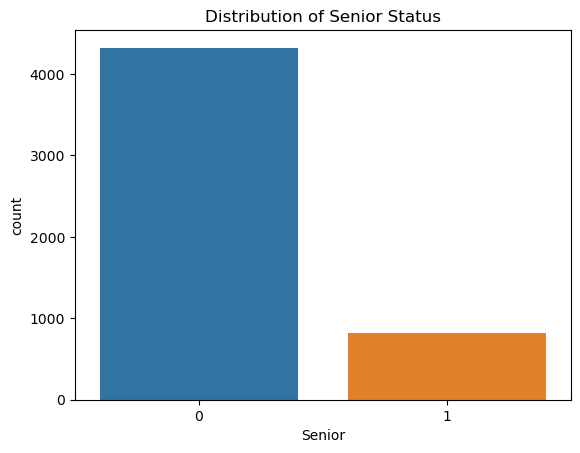

In [30]:
plt.title('Distribution of Senior Status')
sns.countplot(x='Senior',data=data)

<Axes: title={'center': 'Distribution of Education Levels'}, xlabel='Education Level', ylabel='count'>

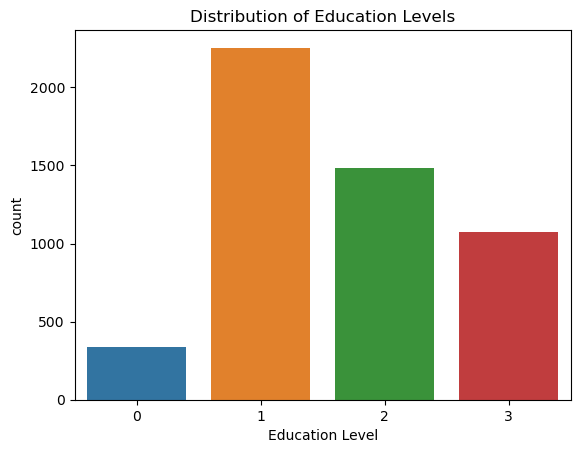

In [31]:
plt.title('Distribution of Education Levels')
sns.countplot(x='Education Level',data=data)

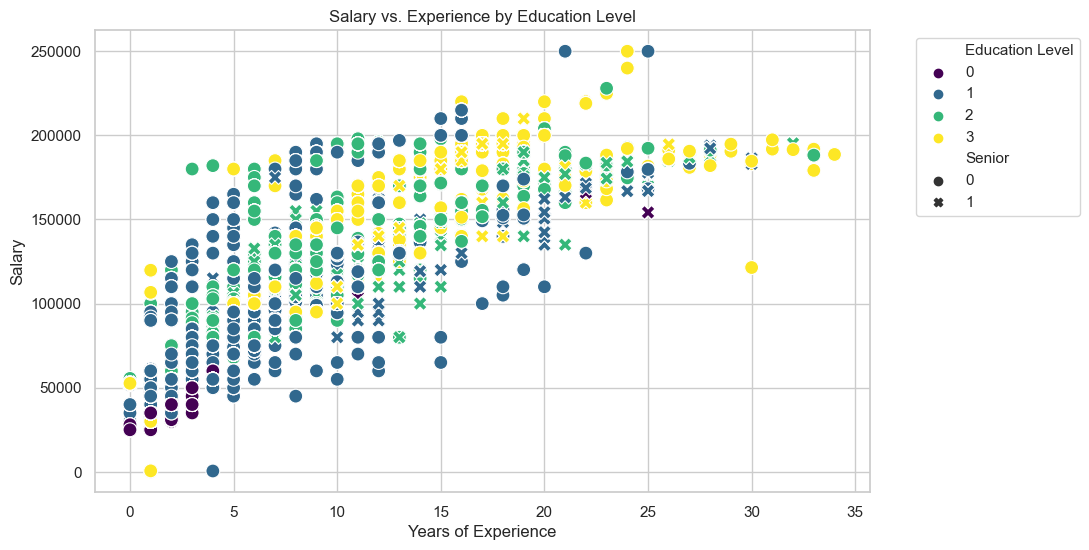

In [46]:
plt.figure(figsize=(10,6))
sns.set(style="whitegrid")
sns.scatterplot(x='Years of Experience',y='Salary', hue='Education Level',style='Senior', data=data, palette='viridis', s=100)
plt.title('Salary vs. Experience by Education Level')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(bbox_to_anchor=(1.05, 1),  loc='upper left')

Text(0, 0.5, 'Frequency')

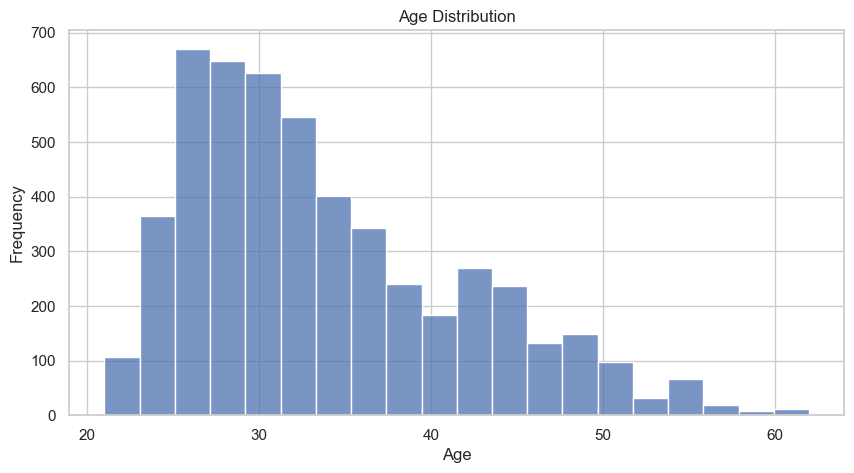

In [57]:
plt.figure(figsize=(10, 5))
sns.histplot(data['Age'], bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')